In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import sin, cos
from math import pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl

# Función Esfera
* $f(x,y)=\sum_{i=1}^nx_i^2+y_i^2$ \
$min f(0,0)=0$

# Función Quadric
* $f(x)=\sum_{i=1}^n(\sum_{j=1}^ix_j)^2$ \
$min f(0,0)=0$

# Función Rosenbrock
* $f(x,y)=\sum_{i=1}^{n}100(y_i-x_i^2)^2+(1-x_i)^2$ \
$min f(1,1)=0$

# Función Rastrigin
* $f(x,y)=20+\sum_{i=1}^n(x_i^2-10\cos(2\pi x_i))+(y_i^2-10\cos(2\pi y_i))$ \
$min f(0,0)=0$

# Función Booth
* $f(x,y)=(x+2y-7)^2 + (2x+y-5)^2$ \
$min f(1,3)=0$

# Función Matyas
* $0.26(x^2+y^2) -0.48xy$ \
$min f(0,0)=0$

In [4]:
plt.style.use("seaborn-v0_8-darkgrid")

In [5]:
x, y, lam = sympy.symbols("x,y,lam")

funciones = {
    "esfera": ["x**2 + y**2", x**2 + y**2],
    "rastrigin": [
        "20 + x**2 - (10 * cos(2 * pi * x)) + y**2 - 10 * cos(2 * pi * y)",
        20 + x**2 - (10 * cos(2 * pi * x)) + y**2 - 10 * cos(2 * pi * y),
    ],
    "rosenbrock": ["(y - x**2) ** 2 + (1 - x) ** 2", (y - x**2) ** 2 + (1 - x) ** 2],
    "booth": [
        "(x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2",
        (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2,
    ],
    "matyas": [
        "0.26 * (x**2 + y**2) - 0.48 * x * y",
        0.26 * (x**2 + y**2) - 0.48 * x * y,
    ],
}
funcion = "booth"
name_funcion = funcion.capitalize()
expresionf = (funciones[funcion][0]).replace(" ", "")
fun = lambda x, y: np.array(funciones[funcion][1])
f = sympy.lambdify((x, y), expresionf, "numpy")

dif1_x = sympy.diff(funciones[funcion][1], x)
dif2_xx = sympy.diff(dif1_x, x)
dif2_xy = sympy.diff(dif1_x, y)

dif1_y = sympy.diff(funciones[funcion][1], y)
dif2_yy = sympy.diff(dif1_y, y)
dif2_yx = sympy.diff(dif1_y, x)

df1X = sympy.lambdify((x, y), dif1_x, "numpy")
df2Xx = sympy.lambdify((x, y), dif2_xx, "numpy")
df2Xy = sympy.lambdify((x, y), dif2_xy, "numpy")

df1Y = sympy.lambdify((x, y), dif1_y, "numpy")
df2Yy = sympy.lambdify((x, y), dif2_yy, "numpy")
df2Yx = sympy.lambdify((x, y), dif2_yx, "numpy")

print(name_funcion)
print(type(f))
print(f)
print(fun)
print(expresionf)
print("f'x: ", dif1_x)
print("f''xx: ", dif2_xx)
print("f''xy: ", dif2_xy)
print(" ")
print("f'y: ", dif1_y)
print("f''yy: ", dif2_yy)
print("f''yx: ", dif2_yx)

Booth
<class 'function'>
<function _lambdifygenerated at 0x71c884b30e00>
<function <lambda> at 0x71c885541300>
(x+2*y-7)**2+(2*x+y-5)**2
f'x:  10*x + 8*y - 34
f''xx:  10
f''xy:  8
 
f'y:  8*x + 10*y - 38
f''yy:  10
f''yx:  8


# Gradiente Descendente
$\theta = \theta_0 - \eta*\bigtriangledown f(x,y)$

In [6]:
def Descenso_Gradiente(
    Xini: float, Yini: float, rate: float, N_iter: int, tolerancia: float
):
    """
    Algoritmo del Descenso de gradiente bidimensional

    Args:
        Xini (float): Posicion inicial en x
        Yini (float): Posicion inicial en y
        rate (float): learning rate
        N_iter (int): Numero de iteraciones
        tolerancia (float): factor de parada

    Returns:
        cont_iter   (int): iteraciones ejecutadas
        VecX[-1]    (float): minimizador en X
        VecY[-1]    (float): minimizador en X
        VecZ[-1]    (float): minimo encontrado
    """

    # f -> corresponde a la funcion costo (numpy.array)
    # df1X -> corresponde a la derivada en X de la funcion costo (numpy.array)
    # df1Y -> corresponde a la derivada en Y de la funcion costo (numpy.array)

    Zini = f(np.copy(Xini), np.copy(Yini))
    VecX = [Xini]
    VecY = [Yini]
    VecZ = [Zini]

    cont_iter = 0
    for i in range(N_iter):
        Xi = Xini - np.dot(rate, df1X(Xini, Yini))
        Yi = Yini - np.dot(rate, df1Y(Xini, Yini))
        Zi = f(Xi, Yi)
        VecX = np.append(VecX, Xi)
        VecY = np.append(VecY, Yi)
        VecZ = np.append(VecZ, Zi)
        Xini = Xi
        Yini = Yi

        cont_iter += 1

        if VecZ[i] - Zi <= tolerancia:
            break
    return (cont_iter, VecX, VecY, VecZ)

In [7]:
Xinicial = -3.5
Yinicial = 2.5
rate = 0.005
N_iter = 500
tolerancia = 0.0001

cont_iter, VecX, VecY, VecZ = Descenso_Gradiente(
    Xinicial, Yinicial, rate, N_iter, tolerancia
)

print("X: ", np.shape(VecX), VecX[-1])
print("Y: ", np.shape(VecX), VecY[-1])
print("Z: ", np.shape(VecX), VecZ[-1])

X:  (369,) 0.9504798892198104
Y:  (369,) 3.0495201107801853
Z:  (369,) 0.00490448274336408


/home/julio/Documentos/Python_U/Optimización/Optimizar_ENV/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


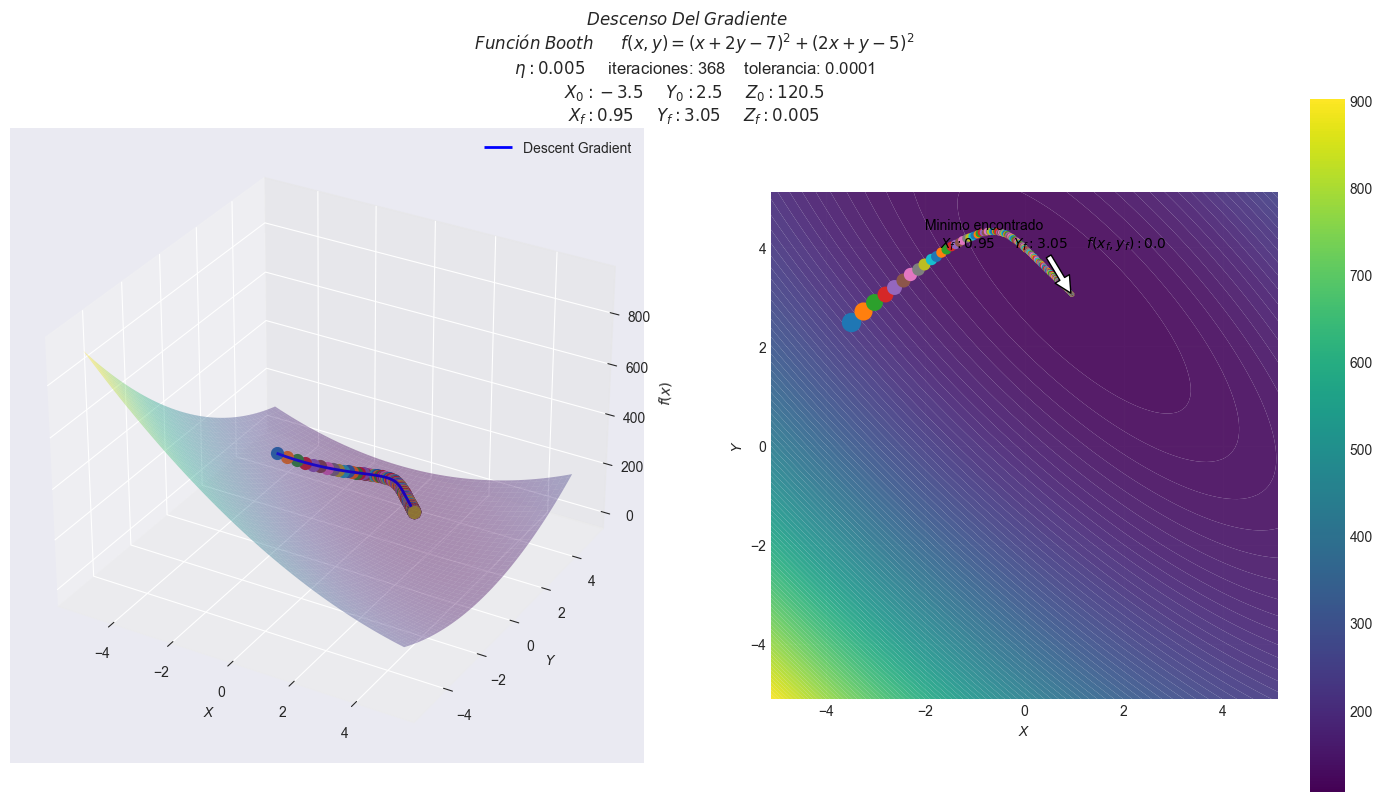

In [8]:
x = y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y, sparse=True)
Z = f(X, Y)

fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122)
cmap = cm.viridis
fig.suptitle(
    rf""" $Descenso$ $Del$ $Gradiente$
    $Función$ ${name_funcion}$      $ f(x,y)={(expresionf.replace('**','^').replace('*',''))} $
    $\eta : {rate}$     iteraciones: {cont_iter}    tolerancia: {tolerancia}
    $X_0:{VecX[0]}$     $Y_0:{VecY[0]}$     $Z_0:{round(VecZ[0],1)}$
    $X_f: {round(VecX[-1],3)}$     $Y_f: {round(VecY[-1],3)}$     $Z_f: {round(VecZ[-1],3)}$"""
)
ax.plot_wireframe(
    VecX,
    VecY,
    np.array([VecZ]),
    color="blue",
    linewidth=2,
    label=rf"Descent Gradient",
)
ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.4, linewidth=0.08, antialiased=True)
ax.legend()
for i in range(len(VecZ)):
    ax.scatter(VecX[i], VecY[i], VecZ[i], linewidths=5)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$f(x)$")

# mapa de contour
ax1.contourf(x, y, Z, 100, cmap=cmap, alpha=0.9, antialiased=True)
for i in range(len(VecZ)):
    ax1.scatter(VecX[i], VecY[i], VecZ[i], linewidths=3)
ax1.annotate(
    rf"""Minimo encontrado
    $X_f: {round(VecX[-1],2)}$     $Y_f: {round(VecY[-1],2)}$     $f(x_f,y_f): {round(VecZ[-1],2)}$""",
    color="black",
    xy=(VecX[i], VecY[i]),
    xytext=(-2, 4),
    arrowprops=dict(facecolor="white", shrink=0.03),
)
ax1.axis("scaled")
ax1.set_xlabel("$X$")
ax1.set_ylabel("$Y$")
norm = mpl.colors.Normalize(vmin=min(Z[:, 0]), vmax=max(Z[:, 1]))
fig.colorbar(cm.ScalarMappable(norm, cmap), ax=ax1)
ax1.grid(True)
plt.show()

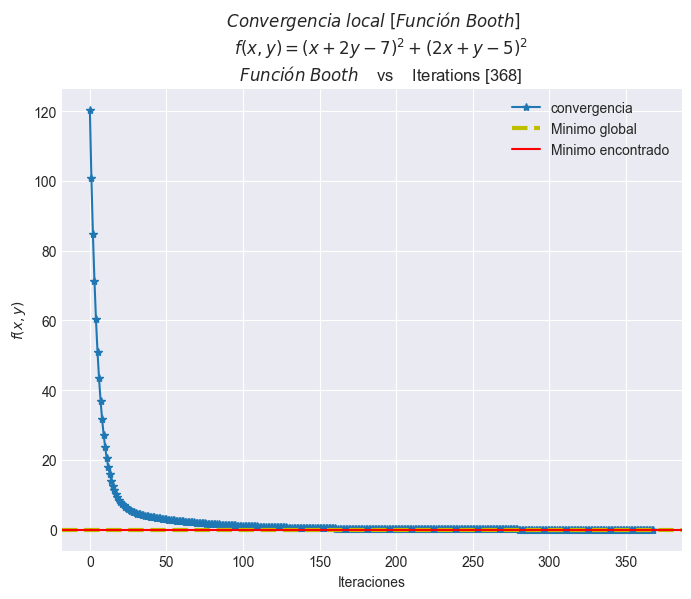

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(cont_iter + 1), VecZ, marker="*", label="convergencia")
ax.set_title(
    rf""" $Convergencia$ $local$ $[Función$ ${name_funcion}]$
    $ f(x,y)={(expresionf.replace('**','^').replace('*',''))} $
    $Función$ ${name_funcion}$    vs    Iterations [{cont_iter}]"""
)
ax.axhline(y=0, color="y", lw=3, ls="--", label="Minimo global")
ax.axhline(y=VecZ[-1], color="r", label="Minimo encontrado")
ax.set_xlabel("Iteraciones")
ax.set_ylabel("$f(x,y)$")
ax.legend()
plt.show()

# Método de Newton
$\theta_{i+1} = \theta_i - \frac{f'(\theta_i)}{f''(\theta_i)}$

In [10]:
def Metodo_Newton(
    Xini: float, Yini: float, rate: float, tolerancia: float, N_iter: int
):
    """_Algoritmo del Metodo de Newton bidimensional_

        Xini (float): Posición inicial en x
        Yini (float): Posición inicial en y
        rate (float): tamaño del paso
        tolerancia (float): factor de parada
        N_iter (int): Numero de iteraciones

    Returns:
        VecX[-1]    (float): minimizador en X
        VecY[-1]    (float): minimizador en X
        VecZ[-1]    (float): mínimo encontrado
        cont_iter   (int): iteraciones ejecutadas
    """
    Zini = f(np.copy(Xini), np.copy(Yini))
    VecX = [Xini]
    VecY = [Yini]
    VecZ = [Zini]
    cont_iter = 0

    for i in range(N_iter):
        Hs = np.array(
            [
                [df2Xx(Xini, Yini), df2Xy(Xini, Yini)],
                [df2Yx(Xini, Yini), df2Yy(Xini, Yini)],
            ]
        )
        Gd = np.array([df1X(Xini, Yini), df1Y(Xini, Yini)])
        [Xi, Yi] = np.array([Xini, Yini]) - (np.dot(np.linalg.inv(Hs), Gd)) * rate
        Zini = f(Xi, Yi)
        VecX = np.append(VecX, Xi)
        VecY = np.append(VecY, Yi)
        VecZ = np.append(VecZ, Zini)
        Xini = Xi
        Yini = Yi
        cont_iter += 1

        if VecZ[i] - Zini <= tolerancia:
            break

    return (VecX, VecY, VecZ, cont_iter)


rate = 1
tolerancia = 0.0001
N_iter = 300
Xinicial = -4.2
Yinicial = -3.7

VecX, VecY, VecZ, cont_iter = Metodo_Newton(
    Xinicial, Yinicial, rate, tolerancia, N_iter
)

print("iteraciones:", cont_iter)
print("X: ", VecX)
print("Y: ", VecY)
print("Z: ", VecZ)

iteraciones: 2
X:  [-4.2  1.   1. ]
Y:  [-3.7  3.   3. ]
Z:  [6.38370000e+02 1.41994963e-29 0.00000000e+00]


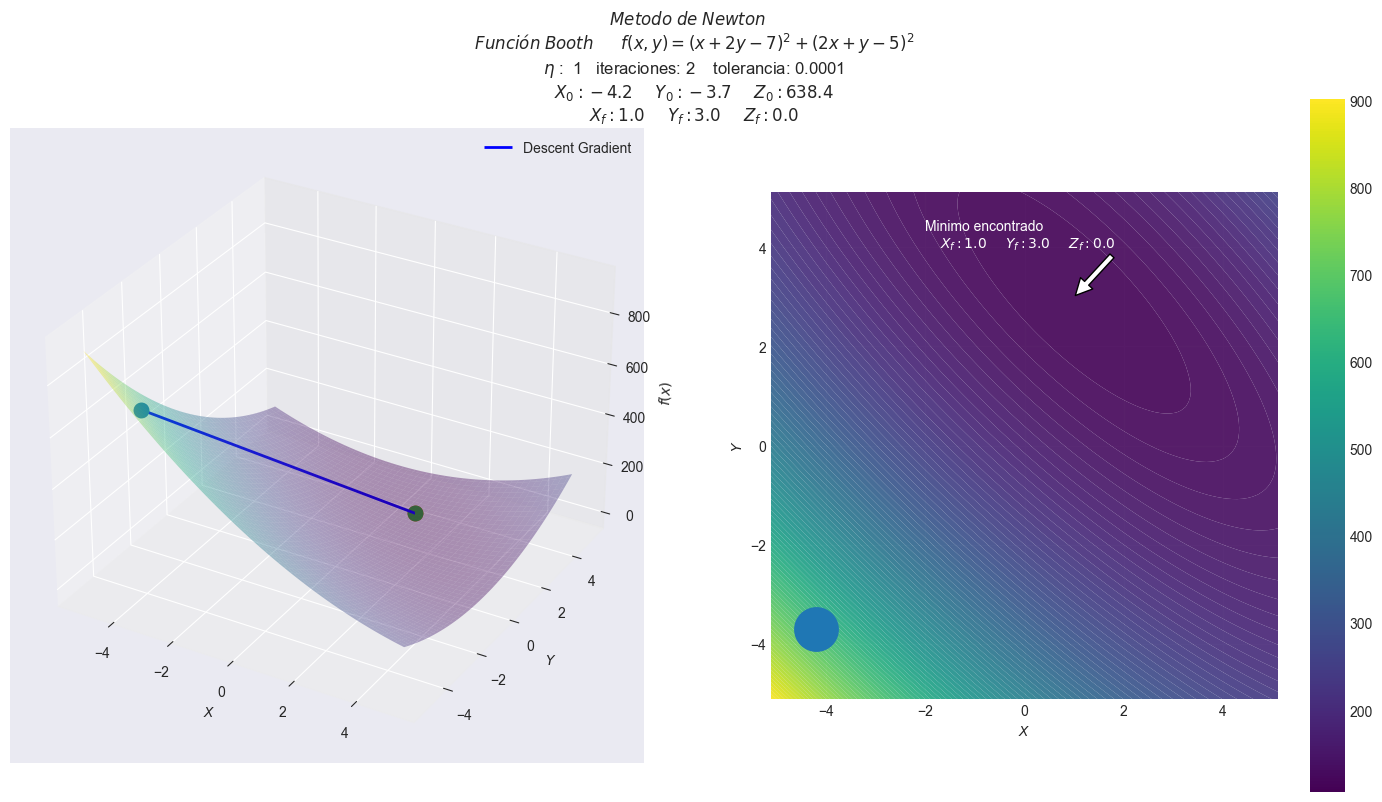

In [11]:
x = y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y, sparse=True)
Z = f(X, Y)

fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122)
cmap = cm.viridis
fig.suptitle(
    rf""" $Metodo$ $de$ $Newton$
    $Función$ ${name_funcion}$      $ f(x,y)={(expresionf.replace('**','^').replace('*',''))} $
    $\eta$ :  {rate}   iteraciones: {cont_iter}    tolerancia: {tolerancia}
    $X_0:{VecX[0]}$     $Y_0:{VecY[0]}$     $Z_0:{round(VecZ[0],1)}$
    $X_f: {round(VecX[-1],3)}$     $Y_f: {round(VecY[-1],3)}$     $Z_f: {round(VecZ[-1],3)}$"""
)
ax.plot_wireframe(
    VecX,
    VecY,
    np.array([VecZ]),
    color="blue",
    linewidth=2,
    label=rf"Descent Gradient",
)
ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.4, linewidth=0.08, antialiased=True)
ax.legend()
for i in range(len(VecZ)):
    ax.scatter(VecX[i], VecY[i], VecZ[i], linewidths=7)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$f(x)$")

# mapa de contour
ax1.contourf(x, y, Z, 100, cmap=cmap, alpha=0.9, antialiased=True)
for i in range(len(VecZ)):
    ax1.scatter(VecX[i], VecY[i], VecZ[i], linewidths=7)
ax1.annotate(
    rf"""Minimo encontrado
    $X_f: {round(VecX[-1],2)}$     $Y_f: {round(VecY[-1],2)}$     $Z_f: {round(VecZ[-1],2)}$""",
    color="white",
    xy=(VecX[i], VecY[i]),
    xytext=(-2, 4),
    arrowprops=dict(facecolor="white", shrink=0.03),
)
ax1.axis("scaled")
ax1.set_xlabel("$X$")
ax1.set_ylabel("$Y$")
norm = mpl.colors.Normalize(vmin=min(Z[:, 0]), vmax=max(Z[:, 1]))
fig.colorbar(cm.ScalarMappable(norm, cmap), ax=ax1)
ax1.grid(True)
plt.show()

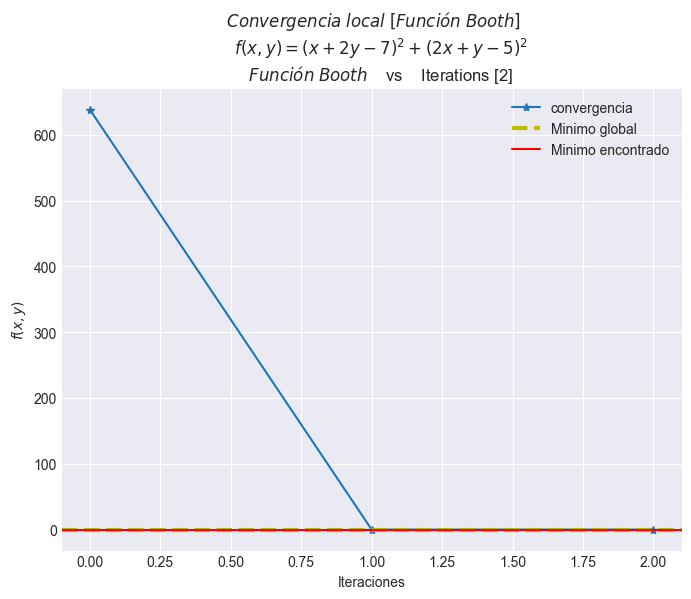

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(cont_iter + 1), VecZ, marker="*", label="convergencia")
ax.set_title(
    rf""" $Convergencia$ $local$ $[Función$ ${name_funcion}]$
    $ f(x,y)={(expresionf.replace('**','^').replace('*',''))} $
    $Función$ ${name_funcion}$    vs    Iterations [{cont_iter}]"""
)
ax.axhline(y=0, color="y", lw=3, ls="--", label="Minimo global")
ax.axhline(y=VecZ[-1], color="r", label="Minimo encontrado")
ax.set_xlabel("Iteraciones")
ax.set_ylabel("$f(x,y)$")
ax.legend()
plt.show()

# Método de Multiplicadores de Lagrange

$ h(x,y,\lambda) = \lambda_{k} g_{k} $

$\bigtriangledown f(x,y)= \lambda\bigtriangledown g(x,y)$

$Restricción$
$g(x,y)=0$

In [ ]:
x, y, l = sympy.symbols("x,y,l")

# función objetivo
fObjetivo = funciones[funcion][1]
f = funciones[funcion][0]
# restricciones
restriccion = 6 * x**2 - 2 * y
R1 = "6 * x**2 - 2 * y"
# Función Langragiana
L = fObjetivo + l * restriccion

print("Funcion:", f)
print("Restriccion:", R1)
Lf = sympy.lambdify((x, y), f, "numpy")
Lr = sympy.lambdify((x, y), restriccion, "numpy")

# Derivadas parciales
dLx = sympy.diff(L, x)
dLy = sympy.diff(L, y)
dLl = sympy.diff(L, l)

print("Langrange:", L)
print("dLx:", dLx)
print("dLy:", dLy)
print("dLl:", dLl)

# Resolver el sistema
sol = sympy.solve([dLx, dLy, dLl], [x, y, l], dict=True)
print(len(sol))
print(sol)

In [ ]:
L2_xx = sympy.diff(dLx, x)
L2_xy = sympy.diff(dLx, y)
L2_yy = sympy.diff(dLy, y)
L2_yx = sympy.diff(dLy, x)
dL2Xx = sympy.lambdify((x, y, l), L2_xx, "numpy")
dL2Xy = sympy.lambdify((x, y, l), L2_xy, "numpy")
dL2Yx = sympy.lambdify((x, y, l), L2_yx, "numpy")
dL2Yy = sympy.lambdify((x, y, l), L2_yy, "numpy")

print(L2_xx, "  ", L2_xy)
print(L2_yx, "  ", L2_yy)
print(sol[0][x].evalf())
print(dL2Xx(sol[0][x], sol[0][y], sol[0][l]))

In [ ]:
Hessiana = np.empty((2, 2), dtype=float)
print(np.shape(Hessiana))

In [ ]:
minimizadores = []
for i in range(len(sol)):
    var_x = sol[i][x].evalf()
    var_y = sol[i][y].evalf()

    if type(var_x) != sympy.core.add.Add and type(var_y) != sympy.core.add.Add:
        Hessiana[0, 0] = dL2Xx(sol[i][x], sol[i][y], sol[i][l])
        Hessiana[0, 1] = dL2Xy(sol[i][x], sol[i][y], sol[i][l])
        Hessiana[1, 0] = dL2Yx(sol[i][x], sol[i][y], sol[i][l])
        Hessiana[1, 1] = dL2Yy(sol[i][x], sol[i][y], sol[i][l])

        print(Hessiana)
        # Calcular el determinante de la hessiana
        detH = np.linalg.det(Hessiana)

        if detH > 0 and Hessiana[0, 0] > 0:
            print(type(var_x), type(var_y))
            minimizadores.append([round(var_x, 3), round(var_y, 3), "mínimo"])
            print(" ")
            print("iter:", i)
            print("x:", sol[i][x].evalf())
            print("y:", sol[i][y].evalf())
            print("l:", sol[i][l].evalf())
            print(
                f"El minimizador {(round(var_x,3),round(var_y,3))} es un mínimo en f=:",
                Lf(var_x, var_y),
            )
        elif detH > 0 and Hessiana[0, 0] < 0:
            print(type(var_x), type(var_y))
            minimizadores.append([round(var_x, 3), round(var_y, 3), "máximo"])
            print(" ")
            print("iter:", i)
            print("x:", sol[i][x].evalf())
            print("y:", sol[i][y].evalf())
            print("l:", sol[i][l].evalf())
            print(
                f"El minimizador {(round(var_x,3),round(var_y,3))} es un máximo en: f=",
                Lf(var_x, var_y),
            )
        elif detH < 0:
            print(type(var_x), type(var_y))
            print(" ")
            print("iter:", i)
            print("x:", sol[i][x].evalf())
            print("y:", sol[i][y].evalf())
            print("l:", sol[i][l].evalf())
            print(
                f"Es un punto {(round(var_x,3),round(var_y,3))} de silla en: f=",
                Lf(var_x, var_y),
            )
        else:
            print("No se puede determinar")

print(" ")
print(minimizadores)

In [ ]:
X = Y = np.linspace(-5.12, 5.12, 100)
Xv, Yv = np.meshgrid(X, Y)
Z = Lf(Xv, Yv)
R = Lr(Xv, Yv)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
ax.set_title(rf"$Multiplicadores$ $de$ $Lagrange$")
ax.set_title(
    rf"""   $Multiplicadores$ $de$ $Lagrange$
    $Función$ ${name_funcion}:$ $ f(x,y)={(expresionf.replace('**','^').replace('*',''))} $
    $Restriccion: g(x,y)={(R1.replace('**','^').replace('*',''))} $
    """
)
ax.plot_surface(Xv, Yv, Z, cmap=cm.viridis, alpha=0.8)
ax.plot_surface(
    Xv,
    Yv,
    R,
    edgecolor="royalblue",
    cmap=cm.YlGnBu_r,
    alpha=0.4,
    linewidth=0.08,
    antialiased=True,
)
for minimizador in minimizadores:
    mx = float(minimizador[0])
    my = float(minimizador[1])
    ml = minimizador[2]
    ax.plot_wireframe(
        mx,
        my,
        Z,
        rstride=0,
        cstride=10,
        label=rf"""minimizador encontrado {(round(mx,2), round(my,2))} --> {ml}: {round(float(Lf(mx, my)),2)}""",
        color="black",
    )
ax.plot_wireframe(
    1,
    3,
    Z,
    rstride=0,
    cstride=10,
    label=rf"""minimizador global {(1, 3)} --> minimo global: 0""",
    color="red",
)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$f(x)$")
ax.grid(True)
ax.legend()
plt.show()

# Conjugate Gradient

Sea una funcíon cuadrática dada por: \
$f(x) =\frac{1}{2}X^{T}Ax-bx+c$ \
par aminimizar $f(x)$ calculamos primero su gradiente: \
$\bigtriangledown(x)= \frac{1}{2}(A^{T}+A)x-b^{T}x$ \
buscamos minimizar, por tanto igualamos a cero: \
$Ax=b$ \
Condicones: \
A definida positiva $x^{T}Ax>0$

In [ ]:
def Conjugate_Gradient(X0, b, A, c, GradA, tolerancia):
    """
        Algoritmo de Optimizacion por Gradiente Conjugado para funciones de la forma cuadratica
    Args:
        X0 (list [int,int]): _punto inicial_
        b (list[int,int]): _coeficiente_
        A (array[ int * int]): _matriz de coeficientes_
        c (list[ int, int]): _coeficiente_
        GradA (int): _grado del polinomio_
        tolerancia (float): _description_

    Returns:
        list[ int, int]: minimizadores x,y.
    """
    k = 0
    puntos = [[X0, round(f(A, X0, b, c), 2)]]
    rk = GradA
    pk = -rk
    xk = X0
    max_iter = 5

    for i in range(max_iter):
        alfa_k = (np.dot(rk.T, rk)) / (np.dot(np.dot(pk.T, A), pk))
        xk = xk + (alfa_k * pk)
        rk_1 = rk + (np.dot(np.dot(alfa_k, A.T), pk))
        beta_k = np.dot(rk_1.T, rk_1) / (np.dot(rk.T, rk))
        pk = -rk_1 + (beta_k * pk)
        rk = rk_1
        k += 1
        puntos.append([xk, round(f(A, xk, b, c), 2)])
        if np.amax(np.abs(rk)) < tolerancia:
            break
    return puntos


def f(A, x, b, c):
    return 0.5 * np.dot(np.dot(x, A), x) - np.dot(b, x) + c


def g(A, x, b):
    return np.dot(A, x) - b


def feature_A(A):
    def valores_propios(A):
        eigs = np.linalg.eigvals(A)
        print("The valores propios de A:", eigs)

        if np.all(eigs > 0):
            return "A es definida positiva"
        elif np.all(eigs >= 0):
            return "A es semi-definida positiva"
        elif np.any(eigs < 0):
            return "A es definida negativa"
        elif np.all(eigs <= 0):
            return "A es semi-definida negatica"
        else:
            return "No se puede determinar"

    def simetria(A):
        if (A.T == A).all() == True:
            return "A es siemtrica"
        else:
            return "A no es simetrica"

    return (valores_propios(A), simetria(A))


def cuadratica_A(*arg: list):
    """
    * Arg[float]:
        * [0]: x^2
        * [1]: y^2
        * [2]: x*y
        * [3]: x
        * [4]: y
        * [5]: c
        * [6]: x0
        * [7]: y0
    """
    A = np.array([[2 * arg[0], arg[2]], [arg[2], 2 * arg[1]]])
    b = -np.array([arg[3], arg[4]])
    c = arg[5]

    x, y = sympy.symbols("x,y")
    fxy = (
        arg[0] * x * x
        + arg[1] * y * y
        + arg[2] * x * y
        + arg[3] * x
        + arg[4] * y
        + arg[5]
    )
    f = sympy.lambdify((x, y), fxy, "numpy")
    dfx = sympy.diff(fxy, x)
    dfy = sympy.diff(fxy, y)
    dfxv = sympy.lambdify((x, y), dfx, "numpy")
    dfyv = sympy.lambdify((x, y), dfy, "numpy")
    gradf = np.array([float(dfxv(arg[6], arg[7])), float(dfyv(arg[6], arg[7]))])

    return (f, gradf, A, b, c)

In [ ]:
if __name__ == "__main__":
    # A = np.array([[4, 2], [2, 2]])
    # b = [-1, 1]
    X0 = [-4, 3.5]
    f_, gf_, A_, b_, c_ = cuadratica_A(5, 5, 8, 0, 0, 0, X0[0], X0[1])
    print(feature_A(A_))
    print(f_(X0[0], X0[1]))
    # optimo = Conjugate_Gradient(X0, b, A, g(A, X0, b), 0.001)
    optimo = Conjugate_Gradient(X0, b_, A_, c_, gf_, 0.001)
    print("minimizador x*:", optimo[-1][0])
    print("minimo f(x*)=", optimo[-1][1])
    print(f(A_, optimo[-1][0], b_, c_))
    print(f_(optimo[-1][0][0], optimo[-1][0][1]))
    print(A_)
    print(b_)
    print(c_)

In [ ]:
x = y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y, sparse=True)
Z = f_(X, Y)

VecX = [float(xi[0][0]) for xi in optimo]
VecY = [float(yi[0][1]) for yi in optimo]
VecZ = [float(zi[1]) for zi in optimo]
print(VecX)
print(VecY)
print(VecZ)
print(len(VecX), len(VecY), len(VecZ))

In [ ]:
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122)
cmap = cm.viridis
fig.suptitle(
    rf""" $Conjugate$ $Gradient$
    $Función$ ${name_funcion}$      $f(x,y)={(expresionf.replace('**','^').replace('*',''))} $
    $X_0:{round(VecX[0],2)}$     $Y_0:{round(VecY[0],2)}$     $Z_0:{round(VecZ[0],1)}$
    $X_f: {round(VecX[-1],2)}$     $Y_f: {round(VecY[-1],2)}$     $Z_f: {round(VecZ[-1],2)}$
    iteraciones: 2"""
)
ax.plot_wireframe(
    VecX,
    VecY,
    np.array([VecZ]),
    color="blue",
    linewidth=2,
    label=rf"Conjugate Gradient",
)
ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.4, linewidth=0.08, antialiased=True)
ax.legend()
for i in range(len(VecZ)):
    ax.scatter(VecX[i], VecY[i], VecZ[i], linewidths=5)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$f(x)$")

# mapa de contour
ax1.contourf(x, y, Z, 100, cmap=cmap, alpha=0.9, antialiased=True)
for i in range(len(VecZ)):
    ax1.scatter(VecX[i], VecY[i], VecZ[i], linewidths=5)
ax1.annotate(
    rf"""                Minimo encontrado
    $X_f: {round(VecX[-1],2)}$     $Y_f: {round(VecY[-1],2)}$     $Z_f: {round(VecZ[-1],2)}$""",
    color="black",
    xy=(VecX[i], VecY[i]),
    xytext=(-2, 4),
    arrowprops=dict(facecolor="white", shrink=0.03),
)
ax1.axis("scaled")
ax1.set_xlabel("$X$")
ax1.set_ylabel("$Y$")
norm = mpl.colors.Normalize(vmin=min(Z[:, 0]), vmax=max(Z[:, 1]))
fig.colorbar(cm.ScalarMappable(norm, cmap), ax=ax1, use_gridspec=True)
ax1.grid(True)
plt.show()

## Metodo Simplex

In [ ]:
class Simplex:
    def __init__(self):
        self.table = []

    def ingresar_objetive_function(self, fobj=list):
        self.table.append(fobj)

    def ingresar_restrictions(self, sa: list):
        self.table.append(sa)

    def get_entry_column(self) -> int:
        column_pivot = min(self.table[0])
        index = self.table[0].index(column_pivot)

        return index

    def get_exit_line(self, entry_column: int) -> int:
        results = {}
        for line in range(len(self.table)):
            if line > 0:
                if self.table[line][entry_column] > 0:
                    division = self.table[line][-1] / self.table[line][entry_column]
                    results[line] = division
        index = min(results, key=results.get)

        return index

    def calculate_new_pivot_line(self, entry_column: int, exit_line: int) -> list:
        line = self.table[exit_line]
        pivot = line[entry_column]
        new_pivot_line = [value / pivot for value in line]
        return new_pivot_line

    def calculate_new_line(
        self, line: list, entry_column: int, pivot_line: list
    ) -> list:
        pivot = line[entry_column] * -1
        result_line = [value * pivot for value in pivot_line]
        new_line = []
        for i in range(len(result_line)):
            sum_value = result_line[i] + line[i]
            new_line.append(sum_value)

        return new_line

    def is_negative(self) -> bool:
        negative = list(filter(lambda x: x < 0, self.table[0]))

        return True if len(negative) > 0 else False

    def ver_tabla(self):
        for i in range(len(self.table)):
            for j in range(len(self.table[0])):
                print(f"{self.table[i][j]}\t", end="")
            print()

    def calcular(self):
        entry_column = self.get_entry_column()
        first_exit_line = self.get_exit_line(entry_column)
        pivot_line = self.calculate_new_pivot_line(entry_column, first_exit_line)
        self.table[first_exit_line] = pivot_line
        table_copy = self.table.copy()
        index = 0
        while index < len(self.table):
            if index != first_exit_line:
                line = table_copy[index]
                new_line = self.calculate_new_line(line, entry_column, pivot_line)
                self.table[index] = new_line
            index += 1

    def solucionar(self):
        self.calcular()

        while self.is_negative():
            self.calcular()

        self.ver_tabla()


if __name__ == "__main__":
    simplex = Simplex()
    simplex.ingresar_objetive_function([1, -10, -20, 0, 0, 0, 0])
    simplex.ingresar_restrictions([0, 4, 2, 1, 0, 0, 20])
    simplex.ingresar_restrictions([0, 8, 8, 0, 1, 0, 20])
    simplex.ingresar_restrictions([0, 0, 2, 0, 0, 1, 10])
    simplex.solucionar()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [ ]:
# Funcion objetivo
c = np.array([-22, -45])
# Definir restricciones
A = np.array([[1, 3], [1, 2], [0.5, 1]])
b = np.array([42, 40, 15])
x1_bounds = (0, None)
x2_bounds = (0, None)
# Encontrar el vértice óptimo
res = linprog(c, A_ub=A, b_ub=b, bounds=(x1_bounds, x2_bounds), method="highs")


# Graficar restricciones
x1 = np.linspace(0, 60, 100)
plt.plot(x1, (42 - x1) / 3, label=r"$x_1 + 3x_2 <= 42$")
plt.plot(x1, (40 - x1) / 2, label=r"$x_1 + 2x_2 <= 40$")
plt.plot(x1, (15 - 0.5 * x1) / 1, label=r"$0.5x_1 + x_2 <= 15$")

plt.fill_between(
    x1, 0, (42 - x1) / 3, where=((42 - x1) / 3 >= 0) & (x1 >= 0), alpha=0.1
)
plt.fill_between(
    x1, 0, (40 - x1) / 2, where=((40 - x1) / 2 >= 0) & (x1 >= 0), alpha=0.1
)
plt.fill_between(
    x1, 0, (15 - 0.5 * x1) / 1, where=((15 - 0.5 * x1) / 1 >= 0) & (x1 >= 0), alpha=0.1
)

plt.xlim(x1_bounds)
plt.ylim(x2_bounds)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()

# Agregar el punto de la solución óptima al gráfico
vertice_optimo = (res.x[0], res.x[1])
plt.plot(vertice_optimo[0], vertice_optimo[1], "ro", markersize=10)

plt.annotate(
    rf"""                Maximo encontrado
    $X_1: {round(vertice_optimo[0],2)}$     $X_2: {round(vertice_optimo[1],2)}$     $c^Tx: {round(-res.fun,2)}$""",
    color="black",
    xy=(res.x[0], res.x[1]),
    xytext=(15, 15),
    arrowprops=dict(facecolor="blue", shrink=0.03),
)
plt.grid()
plt.show()

print(
    "El máximo se alcanza en x1 = ",
    res.x[0],
    "y x2 = ",
    res.x[1],
    "con un valor de ",
    -res.fun,
)

In [ ]:
# Minimizar
# Funcion objetivo
c = np.array([1.5, 2.5])
# Definir restricciones
A = np.array([[2, 1], [-1, -1], [1, 0]])
b = np.array([90, -50, 10])
x1_bounds = (0, None)
x2_bounds = (0, None)
# Encontrar el vértice óptimo
res = linprog(c, A_ub=A, b_ub=b, bounds=(x1_bounds, x2_bounds), method="highs")

print(
    "El maximo se alcanza en x1 = ",
    res.x[0],
    "y x2 = ",
    res.x[1],
    "con un valor de ",
    res.fun,
)

In [ ]:
# Graficar restricciones
x1 = np.linspace(0, 60, 100)
plt.plot(x1, (90 - 2 * x1), label=r"$2x_1 + x_2 <= 90$")
plt.plot(x1, (50 - x1), label=r"$x_1 + x_2 >= 50$")
plt.plot(10 * np.ones(100), x1 * 1.5, label=r"$x_1 <= 10$")

plt.fill_between(
    x1,
    0,
    (90 - 2 * x1),
    where=(90 - 2 * x1 <= 90) & (x1 >= 0),
    color="green",
    alpha=0.2,
)
plt.fill_between(x1, 90, 0, where=x1 <= 10, color="yellow", alpha=0.2)
plt.fill_between(
    x1, 50 - x1, (95 + x1), where=(x1 <= 50) & (x1 >= 0), color="red", alpha=0.1
)

plt.xlim((0, 50))
plt.ylim((0, 95))
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()

# Agregar el punto de la solución óptima al gráfico
vertice_optimo = (res.x[0], res.x[1])
plt.plot(vertice_optimo[0], vertice_optimo[1], "ro", markersize=10)

plt.annotate(
    rf"""                Minimo encontrado
    $X_1: {round(vertice_optimo[0],2)}$     $X_2: {round(vertice_optimo[1],2)}$     $c^Tx: {round(res.fun,2)}$""",
    color="black",
    xy=(res.x[0], res.x[1]),
    xytext=(23, 55),
    arrowprops=dict(facecolor="blue", shrink=0.03),
)
plt.grid()
plt.show()